In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = pd.read_csv("train_cleaned.csv") #import training data, training data has features and label
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


## Split into Train, Validation and Test

In [9]:
from sklearn.model_selection import train_test_split

X = train.drop('labels', 1)
y = train['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Balancing the imbalanced data

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [12]:
print(X_train.shape)
print(y_train.shape)

(38398, 16)
(38398,)


In [13]:
df_train_smote = X_train.merge(y_train.to_frame(), left_index=True, right_index=True)
df_train_smote.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,0.104364,0.459780,-1.057041,0.646287,-0.566950,0.236326,0.182198,0,2,1,0,1,0,0,8,0,0
1,-0.178225,-0.097839,-0.216657,-0.171011,0.076245,-0.304531,-0.251940,7,1,1,0,1,0,0,5,3,0
2,0.104364,-0.237729,0.503673,-0.647445,-0.245352,-0.304531,-0.251940,1,1,0,0,1,0,0,0,3,0
3,-1.402780,-0.260073,1.103947,0.630793,-0.566950,-0.304531,-0.251940,1,2,2,0,0,0,0,8,3,1
4,-1.120190,-0.183004,1.464112,-0.728787,-0.566950,-0.304531,-0.251940,4,1,2,0,0,0,0,4,3,0
5,0.198560,13.036979,0.263563,-0.736534,0.397843,-0.304531,-0.251940,4,1,2,0,0,0,0,1,3,0
6,1.705704,-0.147707,1.464112,-0.256226,-0.566950,-0.304531,-0.251940,5,0,1,0,0,0,0,4,3,0
7,-0.178225,1.943527,-0.816932,-0.705546,-0.566950,-0.304531,-0.251940,10,1,0,0,0,0,2,6,3,0
8,1.799901,3.759514,-1.297151,-0.554482,-0.566950,-0.304531,-0.251940,0,1,1,0,0,0,0,7,3,1
9,1.046329,-0.349448,-0.936986,-0.446025,-0.566950,-0.304531,-0.251940,9,1,1,0,0,0,2,8,3,0


In [14]:
y_train.value_counts()

1    19199
0    19199
Name: labels, dtype: int64

In [15]:
df_train_smote.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000,38398.000000
mean,0.003059,0.039845,-0.055494,0.453158,-0.106694,0.128450,0.095607,4.411506,1.139148,1.211391,0.010495,0.424527,0.101412,0.449867,5.350565,2.441143,0.500000
std,1.085474,0.989171,0.980210,1.307209,0.826411,1.089115,0.874216,3.216097,0.618859,0.724546,0.101909,0.494277,0.301877,0.804009,3.180443,1.025021,0.500007
min,-2.156352,-1.757420,-1.777371,-0.999928,-0.566950,-0.304531,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.837601,-0.387619,-0.936986,-0.426658,-0.566950,-0.304531,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
50%,-0.263823,-0.247138,-0.096602,0.025636,-0.245352,-0.304531,-0.251940,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,0.500000
75%,0.669543,0.088507,0.623728,0.933650,0.076245,0.196805,0.150475,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,3.000000,1.000000
max,4.908384,32.627163,1.824277,18.049683,17.764112,21.870622,17.547714,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


## Model fitting and selection

In [16]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import sklearn.metrics as mt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import datetime as dt

## Random Forest Classifier

In [17]:
start = dt.datetime.now()
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:13.470998


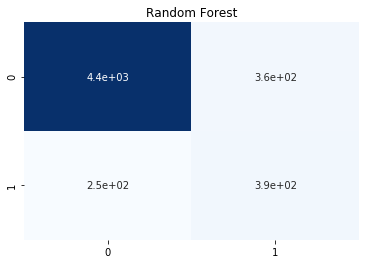

In [18]:
clf_rf_cm=confusion_matrix(y_val.values, clf_rf.predict(X_val))

plt.title("Random Forest")
sns.heatmap(clf_rf_cm, annot = True, cmap="Blues",cbar=False);

In [19]:
print("Random Forest \n")
print(mt.classification_report(y_val, clf_rf.predict(X_val),digits=3), "\n")

Random Forest 

              precision    recall  f1-score   support

           0      0.947     0.924     0.935      4792
           1      0.515     0.609     0.558       634

    accuracy                          0.887      5426
   macro avg      0.731     0.767     0.747      5426
weighted avg      0.897     0.887     0.891      5426
 



## Extra Tree Classifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

start = dt.datetime.now()
clf_et = ExtraTreesClassifier()
clf_et.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:07.760263


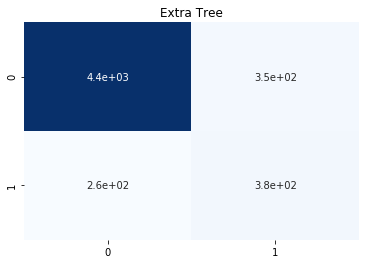

In [21]:
clf_et_cm=confusion_matrix(y_val.values, clf_et.predict(X_val))

plt.title("Extra Tree")
sns.heatmap(clf_et_cm, annot = True, cmap="Blues",cbar=False);

In [22]:
print("Extra Tree \n")
print(mt.classification_report(y_val, clf_et.predict(X_val),digits=3), "\n")

Extra Tree 

              precision    recall  f1-score   support

           0      0.945     0.927     0.936      4792
           1      0.519     0.596     0.555       634

    accuracy                          0.888      5426
   macro avg      0.732     0.761     0.745      5426
weighted avg      0.896     0.888     0.891      5426
 



## XGBoost Classifier

In [26]:
from xgboost import XGBClassifier

start = dt.datetime.now()
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:05.104189


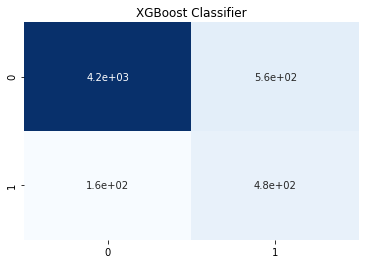

In [27]:
xgb_cm=confusion_matrix(y_val.values, clf_xgb.predict(X_val))

plt.title("XGBoost Classifier")
sns.heatmap(xgb_cm, annot = True, cmap="Blues",cbar=False);

In [28]:
print("XGBoost Classifier \n")
print(mt.classification_report(y_val, clf_xgb.predict(X_val),digits=3), "\n")

XGBoost Classifier 

              precision    recall  f1-score   support

           0      0.964     0.883     0.921      4792
           1      0.458     0.749     0.568       634

    accuracy                          0.867      5426
   macro avg      0.711     0.816     0.745      5426
weighted avg      0.905     0.867     0.880      5426
 



## Optimisation

## XGBoost

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
import time

clf_xgb = XGBClassifier()

max_depth= range(5,8)
learning_rate = [0.1, 0.2, 0.3]
colsample_bytree = [0.2,0.3,0.4]
reg_alpha = [0.7,0.8,0.9]
param_grid = dict(max_depth=max_depth,learning_rate=learning_rate,colsample_bytree=colsample_bytree,reg_alpha=reg_alpha)

grid = GridSearchCV(estimator=clf_xgb, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit( X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.925128 using {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 7, 'reg_alpha': 0.7}
Execution time: 134.55280017852783 ms


## Extra Trees

In [33]:
import time

clf_et = ExtraTreesClassifier()

criterion = ['entropy','gini']
max_features = ["auto", "sqrt", "log2"]
n_estimators = [10,50,100]
max_depth = [8,16,32]

param_grid = dict(criterion=criterion,max_features=max_features,n_estimators=n_estimators,max_depth=max_depth)

grid = GridSearchCV(estimator=clf_et, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit( X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.943096 using {'criterion': 'entropy', 'max_depth': 32, 'max_features': 'auto', 'n_estimators': 100}
Execution time: 85.15319514274597 ms


## Random Forest

In [36]:
import time

criterion = ['entropy','gini']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criterion}

clf_rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

start_time = time.time()

# Fit the random search model
random_result = rf_random.fit(X_train, y_train)
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best: 0.933044 using {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Execution time: 126.82161617279053 ms
